# Jonathan Halverson
# Friday, February 24, 2017
# Part 6: When fights are finished

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('halverson')
%matplotlib inline

In [2]:
fights = pd.read_csv('fightmetric_cards/fightmetric_fights.csv', header=0, parse_dates=['Date'])
fighters = pd.read_csv('fightmetric_fighters/fightmetric_fighters.csv', header=0, parse_dates=['Dob'])
fighters['Age'] = (pd.to_datetime('today') - fighters.Dob) / np.timedelta64(1, 'Y')
cols = ['Name', 'Height', 'Reach', 'Stance', 'Dob', 'Age']
df = fights.merge(fighters[cols], how='inner', left_on='Winner', right_on='Name')
df = df.merge(fighters[cols], how='inner', left_on='Loser', right_on='Name', suffixes=('', '_L'))

### Let's consider a subset of the data:

In [18]:
cols = ['Winner', 'Loser', 'Method', 'Round', 'Time', 'Date']
finishes = df[df.Method.isin(['KO/TKO', 'SUB']) & (df.Date > np.datetime64('2005-01-01'))][cols]
finishes.head(5)

,Winner,Loser,Method,Round,Time,Date
2,Miesha Tate,Holly Holm,SUB,5,3:30,2016-03-05
3,Germaine de Randamie,Anna Elmose,KO/TKO,1,3:46,2016-05-08
5,Germaine de Randamie,Larissa Pacheco,KO/TKO,2,2:02,2015-03-14
6,Jessica Andrade,Larissa Pacheco,SUB,1,4:33,2014-09-13
10,Robert Whittaker,Derek Brunson,KO/TKO,1,4:07,2016-11-26


### How many fights are in the subset?

In [15]:
finishes.shape[0]

1952

### Was is the breakdown by round?

In [4]:
method_round = pd.crosstab(index=finishes.Method, columns=finishes.Round, margins=False)
method_round

Round,1,2,3,4,5
Method,,,,,
KO/TKO,668,351,160,11,6
SUB,372,245,124,9,6


In [5]:
method_round / method_round.sum(axis=0)

Round,1,2,3,4,5
Method,,,,,
KO/TKO,0.642308,0.588926,0.56338,0.55,0.5
SUB,0.357692,0.411074,0.43662,0.45,0.5


Note that the previous table implies that there have only been 12 finishes in the 5th round since 2005. Let's look at these fights:

In [19]:
finishes[finishes.Round == 5].reset_index(drop=True)

,Winner,Loser,Method,Round,Time,Date
0,Miesha Tate,Holly Holm,SUB,5,3:30,2016-03-05
1,Anderson Silva,Chael Sonnen,SUB,5,3:10,2010-08-07
2,BJ Penn,Diego Sanchez,KO/TKO,5,2:37,2009-12-12
3,Demetrious Johnson,John Moraga,SUB,5,3:43,2013-07-27
4,TJ Dillashaw,Renan Barao,KO/TKO,5,2:26,2014-05-24
5,TJ Dillashaw,Joe Soto,KO/TKO,5,2:20,2014-08-30
6,Rose Namajunas,Paige VanZant,SUB,5,2:25,2015-12-10
7,Frankie Edgar,Cub Swanson,SUB,5,4:56,2014-11-22
8,Demetrious Johnson,Kyoji Horiguchi,SUB,5,4:59,2015-04-25
9,Stipe Miocic,Mark Hunt,KO/TKO,5,2:47,2015-05-09


### What is the proportion of each finishing method for each round?

In [7]:
tko = finishes[finishes.Method == 'KO/TKO'].Round.value_counts()
sub = finishes[finishes.Method == 'SUB'].Round.value_counts()
tko_p = 100.0 * tko / (tko + sub)
sub_p = 100.0 * sub / (tko + sub)

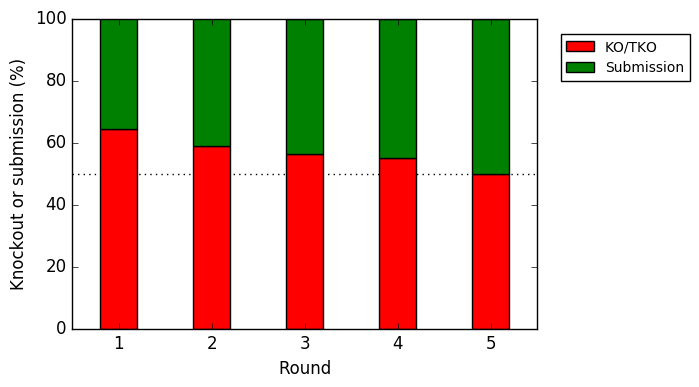

In [8]:
plt.plot([-0.5, 4.5], [50, 50], 'k:', zorder=0)
plt.bar(range(5), tko_p, width=0.4, color='r', tick_label=[1, 2, 3, 4, 5], align='center', label='KO/TKO')
plt.bar(range(5), sub_p, width=0.4, color='g', bottom=tko_p, align='center', label='Submission')
plt.xlim(-0.5, 4.5)
plt.legend(loc=(1.05, 0.8))
plt.xlabel('Round')
plt.ylabel('Knockout or submission (%)')

### Are the result statistically significant?

In [13]:
from scipy.stats import chi2_contingency

chi_sq, p_value, dof, expect = chi2_contingency(method_round)
chi_sq, p_value, dof, p_value > 0.05

9.14627370777 0.0575455316926 4 True


We see that the null hypotheis should be accepted. There is not enough evidence to conclude that there is a decreasing trend with round number.